In [2]:
%matplotlib inline

# Fetching the data

### A simple HTTP request

In [1]:
import requests

print requests.get("http://www.blocket.se/stockholm?q=macbook air").text






<!doctype html>
<html lang="sv">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="viewport" content="width=1012" />



<title>Stockholm  | Blocket</title>
<meta name="keywords" content=",Stockholm" />

<meta name="description" content="On Blocket you can see  ads in Stockholm" />



	
		<link rel="canonical" href="http://www.blocket.se/stockholm/">
		
	


	
		
		<link rel="next" href="http://www.blocket.se/hela_sverige?q=macbook%20air&o=2" />
	



<meta name="googlebot" content="noarchive" />
<meta name="application-name" content="Blocket"/>







<meta name="google" content="nositelinkssearchbox">

 
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" href="/apple-touch-icon.png">
<link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png">
<link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png">
<link rel="apple-touch-icon" sizes="76x76" href="/apple-touch

### Communicating with APIs

In [14]:
import requests

response = requests.get("https://www.googleapis.com/books/v1/volumes", params={"q":"machine learning"})
raw_data = response.json()
titles = [item['volumeInfo']['title'] for item in raw_data['items']]
titles

[u'The Computational Complexity of Machine Learning',
 u'Elements of Machine Learning',
 u'Machine Learning',
 u'Machine Learning',
 u'Principles and Theory for Data Mining and Machine Learning',
 u'Machine Learning in Non-stationary Environments',
 u'Machine Learning Proceedings 1991',
 u'Machine Learning',
 u'Machine Learning and Image Interpretation',
 u'Graphical Models for Machine Learning and Digital Communication']

In [29]:
response = requests.get("https://ajax.googleapis.com/ajax/services/feed/load?v=1.0&q=http://www.google.com/trends/hottrends/atom/feed?pn=p1")

In [34]:
import json
parsed_json = json.loads(response)

TypeError: expected string or buffer

In [15]:
import lxml.html

page = lxml.html.parse("http://www.blocket.se/stockholm?q=macbook air")
# This is probably illegal. Do not use at all
items_data = []
for el in page.getroot().find_class("item_row"):
    links = el.find_class("item_link")
    images = el.find_class("item_image")
    prices = el.find_class("list_price")
    if links and images and prices and prices[0].text:
        items_data.append({"name": links[0].text,
                           "image": images[0].attrib['src'],
                           "price": int(prices[0].text.split(":")[0].replace(" ", ""))})
items_data

[{'image': 'https://cdn.blocket.com/static/1/lithumbs/20/2061849684.jpg',
  'name': u'Macbook Air 13 Helt ny oanv\xe4nd',
  'price': 7000},
 {'image': 'https://cdn.blocket.com/static/2/lithumbs/20/2034462877.jpg',
  'name': 'Macbook Air 13.3 (i5,4GB,128SSD 2013)',
  'price': 4000},
 {'image': 'https://cdn.blocket.com/static/2/lithumbs/19/1983133248.jpg',
  'name': 'MacBook Air',
  'price': 8000},
 {'image': 'https://cdn.blocket.com/static/0/lithumbs/19/1914880740.jpg',
  'name': 'MacBook Air 2015 128GB',
  'price': 7500},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/19/1921278884.jpg',
  'name': 'Macbook Air',
  'price': 6500},
 {'image': 'https://cdn.blocket.com/static/2/lithumbs/19/1971545435.jpg',
  'name': 'MacBook Air | 13,3" | 1,6 GHz | 8 GB | 128 GB',
  'price': 9000},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/19/1930598270.jpg',
  'name': u'MacBook air 13" fr\xe5n 2011',
  'price': 5000},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/17/1744154948.j

In [10]:
items_data[0]['price']

7000

# Reading local data

In [5]:
import pandas

df = pandas.read_csv('sample.csv')

In [6]:
# Display the DataFrame
df

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000
1,1999,Chevy,"Venture ""Extended Edition""",NaN,4900
2,1999,Chevy,"Venture ""Extended Edition, Very Large""",NaN,5000
3,1996,Jeep,Grand Cherokee,"MUST SELL!\nair, moon roof, loaded",NaN


In [7]:
# DataFrame's columns
df.columns

Index([u'Year', u'Make', u'Model', u'Description', u'Price'], dtype='object')

In [8]:
# Values of a given column
df.Model

0                                      E350
1                Venture "Extended Edition"
2    Venture "Extended Edition, Very Large"
3                            Grand Cherokee
Name: Model, dtype: object

# Analyzing the dataframe

## Now we analyze

In [9]:
# Any missing values?
df['Price']

0    3000
1    4900
2    5000
3     NaN
Name: Price, dtype: float64

In [10]:
df['Description']

0                         ac, abs, moon
1                                   NaN
2                                   NaN
3    MUST SELL!\nair, moon roof, loaded
Name: Description, dtype: object

In [11]:
# Fill missing prices by a linear interpolation
df['Description'] = df['Description'].fillna("No description is available.")
df['Price'] = df['Price'].interpolate()

df

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000
1,1999,Chevy,"Venture ""Extended Edition""",No description is available.,4900
2,1999,Chevy,"Venture ""Extended Edition, Very Large""",No description is available.,5000
3,1996,Jeep,Grand Cherokee,"MUST SELL!\nair, moon roof, loaded",5000


# Exploring data

In [12]:
import matplotlib.pyplot as plt

df = pandas.read_csv('sample2.csv')

df

,Office,Year,Sales
0,Stockholm,2004,200
1,Stockholm,2005,250
2,Stockholm,2006,255
3,Stockholm,2007,260
4,Stockholm,2008,264
5,Stockholm,2009,274
6,Stockholm,2010,330
7,Stockholm,2011,364
8,New York,2004,432
9,New York,2005,469


In [13]:
# This table has 3 columns: Office, Year, Sales
print df.columns

# It's really easy to query data with Pandas:
print df[(df['Office'] == 'Stockholm') & (df['Sales'] > 260)]

# It's also easy to do aggregations...
aggregated_sales = df.groupby('Year').sum()
print aggregated_sales

Index([u'Office', u'Year', u'Sales'], dtype='object')
      Office  Year  Sales
4  Stockholm  2008    264
5  Stockholm  2009    274
6  Stockholm  2010    330
7  Stockholm  2011    364
      Sales
Year       
2004    632
2005    719
2006    735
2007    698
2008    594
2009    554
2010    629
2011    594


# Machine learning

## Feature extraction

In [15]:
from sklearn import feature_extraction

### Extracting features from text

In [16]:
corpus = ['All the cats really are great.',
          'I like the cats but I still prefer the dogs.',
          'Dogs are the best.',
          'I like all the trains',
          ]

tfidf = feature_extraction.text.TfidfVectorizer()

print tfidf.fit_transform(corpus).toarray()
print tfidf.get_feature_names()

[[ 0.38761905  0.38761905  0.          0.          0.38761905  0.
   0.49164562  0.          0.          0.49164562  0.          0.25656108
   0.        ]
 [ 0.          0.          0.          0.4098205   0.32310719  0.32310719
   0.          0.32310719  0.4098205   0.          0.4098205   0.42772268
   0.        ]
 [ 0.          0.4970962   0.6305035   0.          0.          0.4970962
   0.          0.          0.          0.          0.          0.32902288
   0.        ]
 [ 0.4970962   0.          0.          0.          0.          0.          0.
   0.4970962   0.          0.          0.          0.32902288  0.6305035 ]]
[u'all', u'are', u'best', u'but', u'cats', u'dogs', u'great', u'like', u'prefer', u'really', u'still', u'the', u'trains']


### Dict vectorizer

In [17]:
import json


data = [json.loads("""{"weight": 194.0, "sex": "female", "student": true}"""),
        {"weight": 60., "sex": 'female', "student": True},
        {"weight": 80.1, "sex": 'male', "student": False},
        {"weight": 65.3, "sex": 'male', "student": True},
        {"weight": 58.5, "sex": 'female', "student": False}]

vectorizer = feature_extraction.DictVectorizer(sparse=False)

vectors = vectorizer.fit_transform(data)
print vectors
print vectorizer.get_feature_names()

[[   1.     0.     1.   194. ]
 [   1.     0.     1.    60. ]
 [   0.     1.     0.    80.1]
 [   0.     1.     1.    65.3]
 [   1.     0.     0.    58.5]]
[u'sex=female', 'sex=male', u'student', u'weight']


### Pre-processing

##### Scaling

In [19]:
from sklearn import preprocessing

data = [[10., 2345., 0., 2.],
        [3., -3490., 0.1, 1.99],
        [13., 3903., -0.2, 2.11]]

print preprocessing.normalize(data)

[[  4.26435200e-03   9.99990544e-01   0.00000000e+00   8.52870400e-04]
 [  8.59598396e-04  -9.99999468e-01   2.86532799e-05   5.70200269e-04]
 [  3.33075223e-03   9.99994306e-01  -5.12423421e-05   5.40606709e-04]]


##### Dimensionality reduction

In [1]:
from sklearn import decomposition

data = [[0.3, 0.2, 0.4,  0.32],
        [0.3, 0.5, 1.0, 0.19],
        [0.3, -0.4, -0.8, 0.22]]

pca = decomposition.PCA()
print pca.fit_transform(data)
print pca.explained_variance_ratio_

ImportError: No module named sklearn

# Machine learning models

## Classification (SVM)

In [21]:
from sklearn import datasets
from sklearn import svm

In [22]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# Training the model
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

# Doing predictions
new_data = [[4.85, 3.1], [5.61, 3.02]]
print clf.predict(new_data)

[0 1]


## Regression (linear regression)

In [23]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

def f(x):
    return x + np.random.random() * 3.

X = np.arange(0, 5, 0.5)
X = X.reshape((len(X), 1))
y = map(f, X)

clf = linear_model.LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

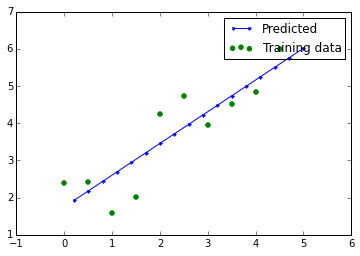

In [24]:
new_X = np.arange(0.2, 5.2, 0.3)
new_X = new_X.reshape((len(new_X), 1))
new_y = clf.predict(new_X)

plt.scatter(X, y, color='g', label='Training data')

plt.plot(new_X, new_y, '.-', label='Predicted')
plt.legend()

## Cross-validation

In [28]:
from sklearn import svm, cross_validation, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

model = svm.SVC()
print cross_validation.cross_val_score(model, X, y, scoring='precision')
print cross_validation.cross_val_score(model, X, y, scoring='mean_squared_error')

[ 0.98148148  0.96491228  0.98039216]
[-0.01960784 -0.03921569 -0.02083333]


## Thanks for following! I hope you learned and want to explore the d